# Introduction to Natural Language Processing

I have started with small basic functions like bigrams, removing punctuation etc. In the field of Natural Langugage Processing, a sample of real world text is referred to as a Corpus (plural Corpora).


In [1]:
import nltk
nltk.download("reuters")

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\abc123\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [2]:
nltk.download('punkt')   # Punkt Tokenizer Model
nltk.download('averaged_perceptron_tagger')  # Part-of-Speech Tokeniser
nltk.download("stopwords") # Stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abc123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abc123\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import reuters
categories = reuters.categories()
print("Number of Categories:",len(categories))
print(categories[0:9],categories[-10:])

Number of Categories: 90
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil'] ['sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [4]:
words = reuters.words()
print("number of words", len(words) )
print("first 10 words:", words[0:9])

number of words 1720901
first 10 words: ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-']


# Filtering text by categories

In [5]:
tradeWords = reuters.words(categories = 'trade')
len(tradeWords)

142723

# # Removing stopwords and punctuation

In [6]:
from nltk.corpus import stopwords
import string
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [7]:
tradeWords = [w for w in tradeWords if w.lower() not in stopwords.words('english') ]

In [8]:
tradeWords = [w for w in tradeWords if w not in string.punctuation]
punctCombo = [c+"\"" for c in string.punctuation ]+ ["\""+c for c in string.punctuation ]
tradeWords = [w for w in tradeWords if w not in punctCombo]
len(tradeWords)

78019

## Word frequency distribution 

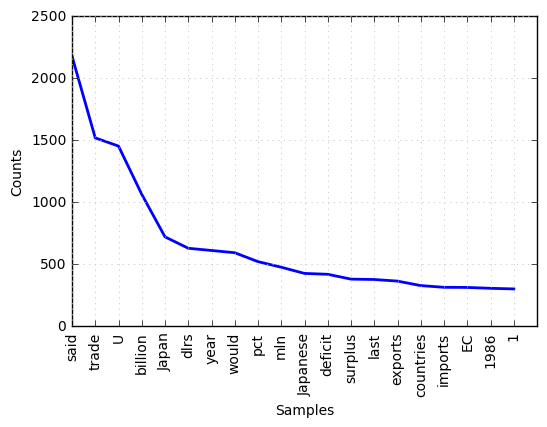

In [9]:
fdist = nltk.FreqDist(tradeWords)
fdist.plot(20, cumulative=False)

In [10]:
for word, frequency in fdist.most_common(10):
    print(word, frequency)

said 2177
trade 1518
U 1452
billion 1063
Japan 720
dlrs 628
year 610
would 592
pct 520
mln 475


# # Bigrams

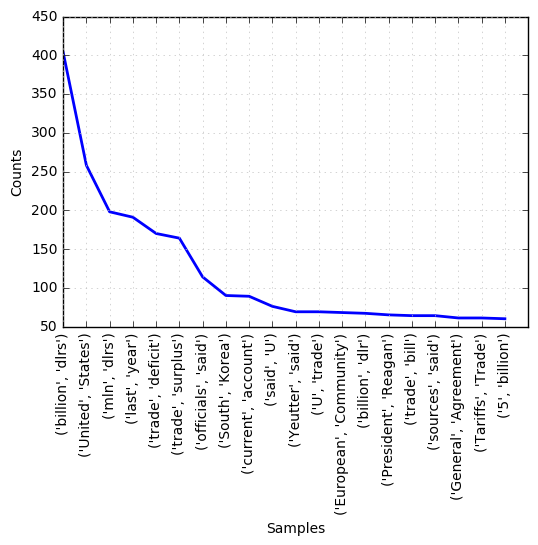

In [11]:
biTradeWords = nltk.bigrams(tradeWords)
biFdist = nltk.FreqDist(biTradeWords)
biFdist.plot(20, cumulative=False)
